In [67]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, display, HTML
import msgpack as mp
import msgpack_numpy as mpn
import base64
from datetime import datetime
import os


In [68]:
base_pth = "C:\mira\splitVideos\SAMXXXXXXXXU010120000000XXXXXXXXX\Session 04-02-22_14-03-00_359"
_prm = os.listdir(r"C:\mira\splitVideos\SAMXXXXXXXXU010120000000XXXXXXXXX\Session 04-02-22_14-03-00_359")

for i in _prm:
    if i.startswith("PARAMS"):
        _p_fname = i
prm_file = base_pth + "\\" + _p_fname
prm_file

p = open(prm_file, "rb")
unpacker = mp.Unpacker(p, object_hook=mpn.decode)
prm = []
for unpacked in unpacker:
    prm.append(unpacked)
prm.pop(0)
prm.pop(0)


video_time = []
for i in prm:
    video_time.append(i[0])
v_start = datetime.strptime(video_time[0], '%Y-%m-%d %H:%M:%S.%f')
v_start

datetime.datetime(2022, 2, 4, 14, 4, 22, 302062)

In [69]:
imu_1 = pd.read_csv(base_pth+"//1_imu.csv")
imu_2 = pd.read_csv(base_pth+"//2_imu.csv")


In [83]:
def datetime_to_s(df, c_name, sys_t=None, offset=0):
    """this function changes datetime string to seconds"""
    inf = datetime.strptime(df[c_name][0], '%Y-%m-%d %H:%M:%S.%f')
    dif_list = []
    for idx, val in enumerate(df[c_name]):
        _val = datetime.strptime(val, '%Y-%m-%d %H:%M:%S.%f')
        if sys_t:
            # diff = (_val - inf) - sys_t
            diff = _val - sys_t

        else:
            diff = _val - inf
            
        _diff = diff.total_seconds()
        # df["seconds"].loc[idx] = _diff
        dif_list.append(_diff)
    df["sys_sec"] = dif_list
    return df

In [84]:
# plt.plot(imu_1["imu_time"], imu_1["ax"])
imu_1 = datetime_to_s(imu_1, "sys_time", v_start)
imu_1

,sys_time,imu_time,ax,ay,az,gx,gy,gz,sys_sec
0,2022-02-04 14:04:38.745643,44.577430,0.006592,-0.493286,0.888306,3.540039,-3.234863,-1.831055,16.443581
1,2022-02-04 14:04:38.746388,44.586615,0.006348,-0.495850,0.882812,3.845215,-3.295898,-2.014160,16.444326
2,2022-02-04 14:04:38.747399,44.595798,0.006836,-0.495117,0.881348,4.211426,-3.112793,-2.319336,16.445337
3,2022-02-04 14:04:38.749400,44.605384,0.008423,-0.484863,0.881470,4.760742,-2.929688,-2.441406,16.447338
4,2022-02-04 14:04:38.750401,44.614567,0.009521,-0.474731,0.884277,4.699707,-2.868652,-2.624512,16.448339
...,...,...,...,...,...,...,...,...,...
2014,2022-02-04 14:05:16.064969,80.921769,0.001465,-0.729492,0.725708,-1.953125,-3.723145,-2.380371,53.762907
2015,2022-02-04 14:05:16.066977,80.929068,0.002563,-0.713623,0.716553,-4.455566,-3.967285,-2.319336,53.764915
2016,2022-02-04 14:05:16.124950,80.938253,0.017822,-0.709595,0.694702,-1.647949,-3.479004,-1.220703,53.822888
2017,2022-02-04 14:05:16.129973,81.098426,0.023804,-0.724731,0.704468,8.300781,-7.507324,-4.455566,53.827911


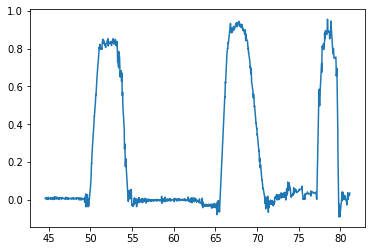

In [72]:
plt.plot(imu_1["imu_time"], imu_1["ax"])

In [73]:
video_data = cv2.VideoCapture(base_pth+"//video.avi")

while video_data.isOpened:
    ret, frame = video_data.read()
    if ret:
        cv2.imshow("",frame)
        # plt.show()
    if cv2.waitKey(25) & 0xFF == ord('q'):
          break
    if not ret:
        break
cv2.destroyAllWindows()
        